In [1]:
#@title Copyright 2020 Google LLC. Double-click here for license information.
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Linear Regression with a Real Dataset

This Colab uses a real dataset to predict the prices of houses in California.   






## Learning Objectives:

After doing this Colab, you'll know how to do the following:

  * Read a .csv file into a [pandas](https://developers.google.com/machine-learning/glossary/#pandas) DataFrame.
  * Examine a [dataset](https://developers.google.com/machine-learning/glossary/#data_set). 
  * Experiment with different [features](https://developers.google.com/machine-learning/glossary/#feature) in building a model.
  * Tune the model's [hyperparameters](https://developers.google.com/machine-learning/glossary/#hyperparameter).

## The Dataset
  
The [dataset for this exercise](https://developers.google.com/machine-learning/crash-course/california-housing-data-description) is based on 1990 census data from California. The dataset is old but still provides a great opportunity to learn about machine learning programming.

## Use the right version of TensorFlow

The following hidden code cell ensures that the Colab will run on TensorFlow 2.X.

In [2]:
#@title Run on TensorFlow 2.x
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


## Import relevant modules

The following hidden code cell imports the necessary code to run the code in the rest of this Colaboratory.

In [3]:
#@title Import relevant modules
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

# The following lines adjust the granularity of reporting. 
pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

## The dataset

Datasets are often stored on disk or at a URL in [.csv format](https://wikipedia.org/wiki/Comma-separated_values). 

A well-formed .csv file contains column names in the first row, followed by many rows of data.  A comma divides each value in each row. For example, here are the first five rows of the .csv file file holding the California Housing Dataset:

```
"longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income","median_house_value"
-114.310000,34.190000,15.000000,5612.000000,1283.000000,1015.000000,472.000000,1.493600,66900.000000
-114.470000,34.400000,19.000000,7650.000000,1901.000000,1129.000000,463.000000,1.820000,80100.000000
-114.560000,33.690000,17.000000,720.000000,174.000000,333.000000,117.000000,1.650900,85700.000000
-114.570000,33.640000,14.000000,1501.000000,337.000000,515.000000,226.000000,3.191700,73400.000000
```



### Load the .csv file into a pandas DataFrame

This Colab, like many machine learning programs, gathers the .csv file and stores the data in memory as a pandas Dataframe.  pandas is an open source Python library.  The primary datatype in pandas is a DataFrame.  You can imagine a pandas DataFrame as a spreadsheet in which each row is identified by a number and each column by a name. pandas is itself built on another open source Python library called NumPy. If you aren't familiar with these technologies, please view these two quick tutorials:

*   [NumPy](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/numpy_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=numpy_tf2-colab&hl=en)
*   [Pandas DataFrames](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en)

The following code cell imports the .csv file into a pandas DataFrame and scales the values in the label (`median_house_value`):

In [56]:
# Import the dataset.
training_df = pd.read_csv("CarPrice_Assignment.csv")

# Scale the label.
#training_df["price"] /= 100.0

# Print the first rows of the pandas DataFrame.
training_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.5,2.7,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.7,3.5,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.2,3.4,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.2,3.4,8.0,115,5500,18,22,17450.0


Scaling `price` puts the value of each house in units of thousands. Scaling will keep loss values and learning rates in a friendlier range.  

Although scaling a label is usually *not* essential, scaling features in a multi-feature model usually *is* essential.

## Examine the dataset

A large part of most machine learning projects is getting to know your data. The pandas API provides a `describe` function that outputs the following statistics about every column in the DataFrame:

* `count`, which is the number of rows in that column. Ideally, `count` contains the same value for every column. 

* `mean` and `std`, which contain the mean and standard deviation of the values in each column. 

* `min` and `max`, which contain the lowest and highest values in each column.

* `25%`, `50%`, `75%`, which contain various [quantiles](https://developers.google.com/machine-learning/glossary/#quantile).

In [57]:
# Get statistics on the dataset.
training_df.describe()


,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0,205.0
mean,103.0,0.8,98.8,174.0,65.9,53.7,2555.6,126.9,3.3,3.3,10.1,104.1,5125.1,25.2,30.8,13276.7
std,59.3,1.2,6.0,12.3,2.1,2.4,520.7,41.6,0.3,0.3,4.0,39.5,477.0,6.5,6.9,7988.9
min,1.0,-2.0,86.6,141.1,60.3,47.8,1488.0,61.0,2.5,2.1,7.0,48.0,4150.0,13.0,16.0,5118.0
25%,52.0,0.0,94.5,166.3,64.1,52.0,2145.0,97.0,3.1,3.1,8.6,70.0,4800.0,19.0,25.0,7788.0
50%,103.0,1.0,97.0,173.2,65.5,54.1,2414.0,120.0,3.3,3.3,9.0,95.0,5200.0,24.0,30.0,10295.0
75%,154.0,2.0,102.4,183.1,66.9,55.5,2935.0,141.0,3.6,3.4,9.4,116.0,5500.0,30.0,34.0,16503.0
max,205.0,3.0,120.9,208.1,72.3,59.8,4066.0,326.0,3.9,4.2,23.0,288.0,6600.0,49.0,54.0,45400.0


### Task 1: Identify anomalies in the dataset

Do you see any anomalies (strange values) in the data? 

In [58]:
#@title Double-click to view a possible answer.

# The values seem sensible enough.

# When you see anomalies in a column, become more careful
# about using that column as a feature. That said,
# anomalies in potential features sometimes mirror 
# anomalies in the label, which could make the column 
# be (or seem to be) a powerful feature.
# Also, as you will see later in the course, you 
# might be able to represent (pre-process) raw data 
# in order to make columns into useful features.

## Define functions that build and train a model

The following code defines two functions:

  * `build_model(my_learning_rate)`, which builds a randomly-initialized model.
  * `train_model(model, feature, label, epochs)`, which trains the model from the examples (feature and label) you pass. 

Since you don't need to understand model building code right now, we've hidden this code cell.  You may optionally double-click the following headline to see the code that builds and trains a model.

In [59]:
#@title Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Describe the topography of the model.
  # The topography of a simple linear regression model
  # is a single node in a single layer.
  model.add(tf.keras.layers.Dense(units=1, 
                                  input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model        


def train_model(model, df, feature, label, epochs, batch_size):
  """Train the model by feeding it data."""

  # Feed the model the feature and the label.
  # The model will train for the specified number of epochs. 
  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=None,
                      epochs=epochs)

  # Gather the trained model's weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the rest of history.
  epochs = history.epoch
  
  # Isolate the error for each epoch.
  hist = pd.DataFrame(history.history)

  # To track the progression of training, we're going to take a snapshot
  # of the model's root mean squared error at each epoch. 
  rmse = hist["root_mean_squared_error"]

  return trained_weight, trained_bias, epochs, rmse

print("Defined the create_model and traing_model functions.")

Defined the create_model and traing_model functions.


## Define plotting functions

The following [matplotlib](https://developers.google.com/machine-learning/glossary/#matplotlib) functions create the following plots:

*  a scatter plot of the feature vs. the label, and a line showing the output of the trained model
*  a loss curve

You may optionally double-click the headline to see the matplotlib code, but note that writing matplotlib code is not an important part of learning ML programming.

In [60]:
#@title Define the plotting functions
def plot_the_model(trained_weight, trained_bias, feature, label):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = training_df.sample(n=200)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = 10000
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()


def plot_the_loss_curve(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

print("Defined the plot_the_model and plot_the_loss_curve functions.")

Defined the plot_the_model and plot_the_loss_curve functions.


## Call the model functions

An important part of machine learning is determining which [features](https://developers.google.com/machine-learning/glossary/#feature) correlate with the [label](https://developers.google.com/machine-learning/glossary/#label). For example, real-life home-value prediction models typically rely on hundreds of features and synthetic features. However, this model relies on only one feature. For now, you'll arbitrarily use `total_rooms` as that feature. 


Epoch 1/50
7/7 [==============================] - 0s 1ms/step - loss: 241074752.0000 - root_mean_squared_error: 15526.5820
Epoch 2/50
7/7 [==============================] - 0s 2ms/step - loss: 240732768.0000 - root_mean_squared_error: 15515.5654
Epoch 3/50
7/7 [==============================] - 0s 2ms/step - loss: 240467232.0000 - root_mean_squared_error: 15507.0059
Epoch 4/50
7/7 [==============================] - 0s 2ms/step - loss: 240221296.0000 - root_mean_squared_error: 15499.0742
Epoch 5/50
7/7 [==============================] - 0s 2ms/step - loss: 239983056.0000 - root_mean_squared_error: 15491.3867
Epoch 6/50
7/7 [==============================] - 0s 2ms/step - loss: 239752880.0000 - root_mean_squared_error: 15483.9561
Epoch 7/50
7/7 [==============================] - 0s 2ms/step - loss: 239525808.0000 - root_mean_squared_error: 15476.6211
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 239300128.0000 - root_mean_squared_error: 15469.3291
Epoch 9/50
7/7 [

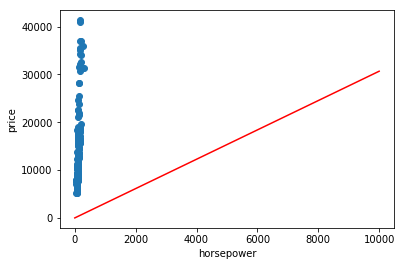

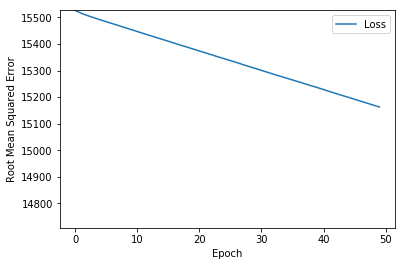

In [61]:
# The following variables are the hyperparameters.
learning_rate = 0.01
epochs = 50
batch_size = 15

# Specify the feature and the label.
my_feature = "horsepower"  # the total number of rooms on a specific city block.
my_label="price" # the median value of a house on a specific city block.
# That is, you're going to create a model that predicts house value based 
# solely on total_rooms.  

# Discard any pre-existing version of the model.
my_model = None

# Invoke the functions.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

print("\nThe learned weight for your model is %.4f" % weight)
print("The learned bias for your model is %.4f\n" % bias )

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

A certain amount of randomness plays into training a model. Consequently, you'll get different results each time you train the model. That said, given the dataset and the hyperparameters, the trained model will generally do a poor job describing the feature's relation to the label.

## Use the model to make predictions

You can use the trained model to make predictions. In practice, [you should make predictions on examples that are not used in training](https://developers.google.com/machine-learning/crash-course/training-and-test-sets/splitting-data). However, for this exercise, you'll just work with a subset of the same training dataset. A later Colab exercise will explore ways to make predictions on examples not used in training.

First, run the following code to define the house prediction function:

In [62]:
def predict_house_values(n, feature, label):
  """Predict house values based on a feature."""

  batch = training_df[feature][1:1 + n]
  predicted_values = my_model.predict_on_batch(x=batch)

  print("feature   label          predicted")
  print("  value   value          value")
  print("          in $           in $")
  print("--------------------------------------")
  for i in range(n):
    print ("%5.0f %6.0f %15.0f" % (training_df[feature][i],
                                   training_df[label][i],
                                   predicted_values[i][0] ))

Now, invoke the house prediction function on 10 examples:

In [63]:
predict_house_values(5, my_feature, my_label)

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
  111  13495             344
  111  16500             476
  154  16500             316
  102  13950             356
  115  17450             341


### Task 2: Judge the predictive power of the model

Look at the preceding table. How close is the predicted value to the label value?  In other words, does your model accurately predict house values?  

In [64]:
#@title Double-click to view the answer.

# Most of the predicted values differ significantly
# from the label value, so the trained model probably 
# doesn't have much predictive power. However, the
# first 10 examples might not be representative of 
# the rest of the examples.  

## Task 3: Try a different feature

The `horsepower` feature had only a little predictive power. Would a different feature have greater predictive power?  Try using `citympg` as the feature instead of `total_rooms`. 

Note: When you change features, you might also need to change the hyperparameters.

Epoch 1/150
7/7 [==============================] - 0s 1ms/step - loss: 239957920.0000 - root_mean_squared_error: 15490.5752
Epoch 2/150
7/7 [==============================] - 0s 2ms/step - loss: 239625968.0000 - root_mean_squared_error: 15479.8564
Epoch 3/150
7/7 [==============================] - 0s 2ms/step - loss: 239374608.0000 - root_mean_squared_error: 15471.7354
Epoch 4/150
7/7 [==============================] - 0s 2ms/step - loss: 239144064.0000 - root_mean_squared_error: 15464.2832
Epoch 5/150
7/7 [==============================] - 0s 2ms/step - loss: 238923360.0000 - root_mean_squared_error: 15457.1455
Epoch 6/150
7/7 [==============================] - 0s 2ms/step - loss: 238705888.0000 - root_mean_squared_error: 15450.1094
Epoch 7/150
7/7 [==============================] - 0s 2ms/step - loss: 238486704.0000 - root_mean_squared_error: 15443.0146
Epoch 8/150
7/7 [==============================] - 0s 2ms/step - loss: 238266320.0000 - root_mean_squared_error: 15435.8779
Epoch 9/

7/7 [==============================] - 0s 2ms/step - loss: 226000000.0000 - root_mean_squared_error: 15033.2959
Epoch 67/150
7/7 [==============================] - 0s 2ms/step - loss: 225789648.0000 - root_mean_squared_error: 15026.2988
Epoch 68/150
7/7 [==============================] - 0s 2ms/step - loss: 225584704.0000 - root_mean_squared_error: 15019.4775
Epoch 69/150
7/7 [==============================] - 0s 2ms/step - loss: 225380240.0000 - root_mean_squared_error: 15012.6689
Epoch 70/150
7/7 [==============================] - 0s 2ms/step - loss: 225173088.0000 - root_mean_squared_error: 15005.7686
Epoch 71/150
7/7 [==============================] - 0s 1ms/step - loss: 224967888.0000 - root_mean_squared_error: 14998.9297
Epoch 72/150
7/7 [==============================] - 0s 2ms/step - loss: 224764544.0000 - root_mean_squared_error: 14992.1494
Epoch 73/150
7/7 [==============================] - 0s 1ms/step - loss: 224558064.0000 - root_mean_squared_error: 14985.2617
Epoch 74/150


7/7 [==============================] - 0s 2ms/step - loss: 212974096.0000 - root_mean_squared_error: 14593.6318
Epoch 132/150
7/7 [==============================] - 0s 2ms/step - loss: 212777568.0000 - root_mean_squared_error: 14586.8975
Epoch 133/150
7/7 [==============================] - 0s 2ms/step - loss: 212581856.0000 - root_mean_squared_error: 14580.1875
Epoch 134/150
7/7 [==============================] - 0s 2ms/step - loss: 212387872.0000 - root_mean_squared_error: 14573.5332
Epoch 135/150
7/7 [==============================] - 0s 1ms/step - loss: 212197152.0000 - root_mean_squared_error: 14566.9883
Epoch 136/150
7/7 [==============================] - 0s 1ms/step - loss: 212001728.0000 - root_mean_squared_error: 14560.2793
Epoch 137/150
7/7 [==============================] - 0s 3ms/step - loss: 211806224.0000 - root_mean_squared_error: 14553.5635
Epoch 138/150
7/7 [==============================] - 0s 2ms/step - loss: 211612288.0000 - root_mean_squared_error: 14546.8994
Epoch 

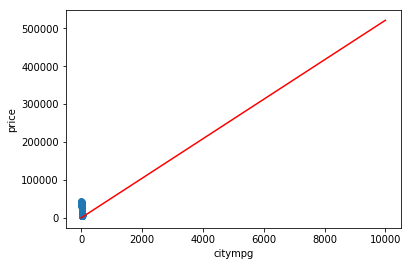

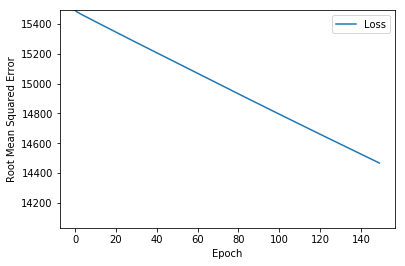

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
   21  13495            1147
   21  16500            1043
   19  16500            1303
   24  13950             991
   18  17450            1043
   19  15250            1043
   19  17710            1043
   19  18920             939
   17  23875             886
   16  17859            1251
   23  16430            1251
   23  16925            1147
   21  20970            1147
   21  21105            1095
   20  24565             886


In [67]:
my_feature = "citympg"   # Replace the ? with population or possibly
                   # a different column name.

# Experiment with the hyperparameters.
learning_rate = 0.5
epochs = 150
batch_size = 120

# Don't change anything below this line.
model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)
plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(15, my_feature, my_label)

Epoch 1/18
7/7 [==============================] - 0s 1ms/step - loss: 239053232.0000 - root_mean_squared_error: 15461.3467
Epoch 2/18
7/7 [==============================] - 0s 1ms/step - loss: 237006848.0000 - root_mean_squared_error: 15395.0264
Epoch 3/18
7/7 [==============================] - 0s 2ms/step - loss: 235473520.0000 - root_mean_squared_error: 15345.1465
Epoch 4/18
7/7 [==============================] - 0s 2ms/step - loss: 234022944.0000 - root_mean_squared_error: 15297.8086
Epoch 5/18
7/7 [==============================] - 0s 1ms/step - loss: 232647072.0000 - root_mean_squared_error: 15252.7725
Epoch 6/18
7/7 [==============================] - 0s 2ms/step - loss: 231282496.0000 - root_mean_squared_error: 15207.9746
Epoch 7/18
7/7 [==============================] - 0s 2ms/step - loss: 229963808.0000 - root_mean_squared_error: 15164.5576
Epoch 8/18
7/7 [==============================] - 0s 1ms/step - loss: 228609616.0000 - root_mean_squared_error: 15119.8418
Epoch 9/18
7/7 [

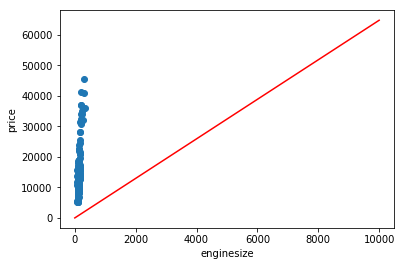

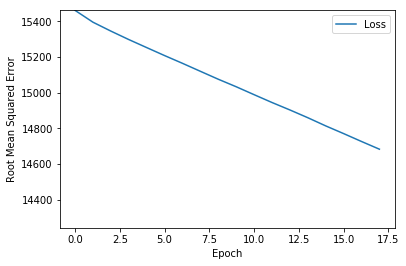

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
  130  13495             849
  130  16500             991
  152  16500             713
  109  13950             888
  136  17450             888
  136  15250             888
  136  17710             888
  136  18920             855
  131  23875             855
  131  17859             706


In [69]:
#@title Double-click to view a possible solution.

my_feature = "enginesize" # Pick a feature other than "total_rooms"

# Possibly, experiment with the hyperparameters.
learning_rate = 0.05
epochs = 18
batch_size = 1

# Don't change anything below.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df, 
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_model(weight, bias, my_feature, my_label)
plot_the_loss_curve(epochs, rmse)

predict_house_values(10, my_feature, my_label)

Did `population` produce better predictions than `total_rooms`?

In [16]:
#@title Double-click to view the answer.

# Training is not entirely deterministic, but population 
# typically converges at a slightly higher RMSE than 
# total_rooms.  So, enginesize appears to be about 
# the same or slightly worse at making predictions 
# than citympg.

## Task 4: Define a synthetic feature

You have determined that `total_rooms` and `population` were not useful features.  That is, neither the total number of rooms in a neighborhood nor the neighborhood's population successfully predicted the median house price of that neighborhood. Perhaps though, the *ratio* of `total_rooms` to `population` might have some predictive power. That is, perhaps block density relates to median house value.

To explore this hypothesis, do the following: 

1. Create a [synthetic feature](https://developers.google.com/machine-learning/glossary/#synthetic_feature) that's a ratio of `total_rooms` to `population`. (If you are new to pandas DataFrames, please study the [Pandas DataFrame Ultraquick Tutorial](https://colab.research.google.com/github/google/eng-edu/blob/master/ml/cc/exercises/pandas_dataframe_ultraquick_tutorial.ipynb?utm_source=linearregressionreal-colab&utm_medium=colab&utm_campaign=colab-external&utm_content=pandas_tf2-colab&hl=en).)
2. Tune the three hyperparameters.
3. Determine whether this synthetic feature produces 
   a lower loss value than any of the single features you 
   tried earlier in this exercise.

Epoch 1/30
7/7 [==============================] - 0s 1ms/step - loss: 199025344.0000 - root_mean_squared_error: 14107.6338
Epoch 2/30
7/7 [==============================] - 0s 2ms/step - loss: 164376752.0000 - root_mean_squared_error: 12820.9502
Epoch 3/30
7/7 [==============================] - 0s 2ms/step - loss: 141875264.0000 - root_mean_squared_error: 11911.1406
Epoch 4/30
7/7 [==============================] - 0s 2ms/step - loss: 124497792.0000 - root_mean_squared_error: 11157.8574
Epoch 5/30
7/7 [==============================] - 0s 2ms/step - loss: 109956304.0000 - root_mean_squared_error: 10486.0049
Epoch 6/30
7/7 [==============================] - 0s 2ms/step - loss: 98432408.0000 - root_mean_squared_error: 9921.3105
Epoch 7/30
7/7 [==============================] - 0s 2ms/step - loss: 88727712.0000 - root_mean_squared_error: 9419.5391
Epoch 8/30
7/7 [==============================] - 0s 2ms/step - loss: 79894616.0000 - root_mean_squared_error: 8938.3789
Epoch 9/30
7/7 [======

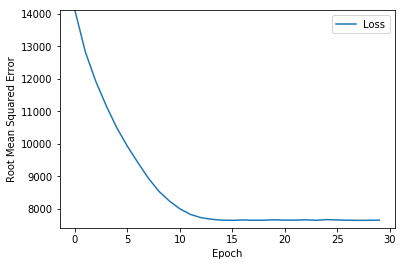

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
 2730  13495           11878
 2730  16500           12565
 2888  16500           11382
 2616  13950           10652
 2448  17450           11243
 2584  15250           11243
 2584  17710           11243
 2584  18920            9690
 2227  23875            9121
 2096  17859           10808
 2484  16430           10808
 2484  16925           14984
 3444  20970           14984
 3444  21105           14270
 3280  24565           14549


In [71]:
# Define a synthetic feature named rooms_per_person
training_df["para"] = training_df["enginesize"]*training_df["citympg"] # write your code here.

# Don't change the next two lines.
my_feature = "para"
my_label="price" 

# Assign values to these three hyperparameters.
learning_rate = 0.05
epochs = 30
batch_size =  15

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, rmse = train_model(my_model, training_df,
                                         my_feature, my_label,
                                         epochs, batch_size)

plot_the_loss_curve(epochs, rmse)
predict_house_values(15, my_feature, my_label)

Epoch 1/100
7/7 [==============================] - 0s 1ms/step - loss: 173320208.0000 - root_mean_squared_error: 13165.1133
Epoch 2/100
7/7 [==============================] - 0s 1ms/step - loss: 142984992.0000 - root_mean_squared_error: 11957.6328
Epoch 3/100
7/7 [==============================] - 0s 2ms/step - loss: 123573872.0000 - root_mean_squared_error: 11116.3789
Epoch 4/100
7/7 [==============================] - 0s 2ms/step - loss: 108990936.0000 - root_mean_squared_error: 10439.8721
Epoch 5/100
7/7 [==============================] - 0s 1ms/step - loss: 96653216.0000 - root_mean_squared_error: 9831.2363
Epoch 6/100
7/7 [==============================] - 0s 2ms/step - loss: 85954464.0000 - root_mean_squared_error: 9271.1631
Epoch 7/100
7/7 [==============================] - 0s 2ms/step - loss: 78281336.0000 - root_mean_squared_error: 8847.6738
Epoch 8/100
7/7 [==============================] - 0s 2ms/step - loss: 71676160.0000 - root_mean_squared_error: 8466.1777
Epoch 9/100
7/7 

7/7 [==============================] - 0s 2ms/step - loss: 58403940.0000 - root_mean_squared_error: 7642.2471
Epoch 68/100
7/7 [==============================] - 0s 2ms/step - loss: 58490184.0000 - root_mean_squared_error: 7647.8877
Epoch 69/100
7/7 [==============================] - 0s 1ms/step - loss: 58370376.0000 - root_mean_squared_error: 7640.0508
Epoch 70/100
7/7 [==============================] - 0s 2ms/step - loss: 58435440.0000 - root_mean_squared_error: 7644.3076
Epoch 71/100
7/7 [==============================] - 0s 2ms/step - loss: 58652072.0000 - root_mean_squared_error: 7658.4639
Epoch 72/100
7/7 [==============================] - 0s 1ms/step - loss: 58470144.0000 - root_mean_squared_error: 7646.5771
Epoch 73/100
7/7 [==============================] - 0s 2ms/step - loss: 58434192.0000 - root_mean_squared_error: 7644.2261
Epoch 74/100
7/7 [==============================] - 0s 2ms/step - loss: 58456352.0000 - root_mean_squared_error: 7645.6753
Epoch 75/100
7/7 [===========

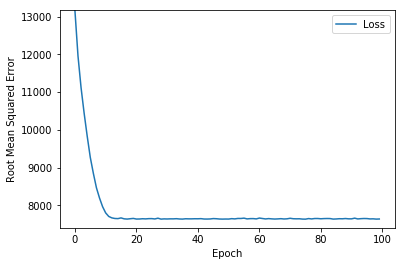

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
 2730  13495           11966
 2730  16500           12658
 2888  16500           11466
 2616  13950           10730
 2448  17450           11326
 2584  15250           11326
 2584  17710           11326
 2584  18920            9762
 2227  23875            9188
 2096  17859           10888
 2484  16430           10888
 2484  16925           15094
 3444  20970           15094
 3444  21105           14376
 3280  24565           14656


In [75]:
#@title Double-click to view a possible solution to Task 4.

# Define a synthetic feature
training_df["para"] = training_df["enginesize"] * training_df["citympg"]
my_feature = "para"
my_label="price" 

# Tune the hyperparameters.
learning_rate = 0.05
epochs = 100
batch_size = 30

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(15, my_feature, my_label)


Based on the loss values, this synthetic feature produces a better model than the individual features you tried in Task 2 and Task 3. However, the model still isn't creating great predictions.


## Task 5. Find feature(s) whose raw values correlate with the label

So far, we've relied on trial-and-error to identify possible features for the model.  Let's rely on statistics instead.

A **correlation matrix** indicates how each attribute's raw values relate to the other attributes' raw values. Correlation values have the following meanings:

  * `1.0`: perfect positive correlation; that is, when one attribute rises, the other attribute rises.
  * `-1.0`: perfect negative correlation; that is, when one attribute rises, the other attribute falls. 
  * `0.0`: no correlation; the two column's [are not linearly related](https://en.wikipedia.org/wiki/Correlation_and_dependence#/media/File:Correlation_examples2.svg).

In general, the higher the absolute value of a correlation value, the greater its predictive power. For example, a correlation value of -0.8 implies far more predictive power than a correlation of -0.2.

The following code cell generates the correlation matrix for attributes of the California Housing Dataset:

In [76]:
# Generate a correlation matrix.
training_df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,para
car_ID,1.0,-0.2,0.1,0.2,0.1,0.3,0.1,-0.0,0.3,-0.2,0.2,-0.0,-0.2,0.0,0.0,-0.1,0.1
symboling,-0.2,1.0,-0.5,-0.4,-0.2,-0.5,-0.2,-0.1,-0.1,-0.0,-0.2,0.1,0.3,-0.0,0.0,-0.1,-0.2
wheelbase,0.1,-0.5,1.0,0.9,0.8,0.6,0.8,0.6,0.5,0.2,0.2,0.4,-0.4,-0.5,-0.5,0.6,0.3
carlength,0.2,-0.4,0.9,1.0,0.8,0.5,0.9,0.7,0.6,0.1,0.2,0.6,-0.3,-0.7,-0.7,0.7,0.2
carwidth,0.1,-0.2,0.8,0.8,1.0,0.3,0.9,0.7,0.6,0.2,0.2,0.6,-0.2,-0.6,-0.7,0.8,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
peakrpm,-0.2,0.3,-0.4,-0.3,-0.2,-0.3,-0.3,-0.2,-0.3,-0.1,-0.4,0.1,1.0,-0.1,-0.1,-0.1,-0.6
citympg,0.0,-0.0,-0.5,-0.7,-0.6,-0.0,-0.8,-0.7,-0.6,-0.0,0.3,-0.8,-0.1,1.0,1.0,-0.7,0.3
highwaympg,0.0,0.0,-0.5,-0.7,-0.7,-0.1,-0.8,-0.7,-0.6,-0.0,0.3,-0.8,-0.1,1.0,1.0,-0.7,0.2
price,-0.1,-0.1,0.6,0.7,0.8,0.1,0.8,0.9,0.6,0.1,0.1,0.8,-0.1,-0.7,-0.7,1.0,0.3


The correlation matrix shows nine potential features (including a synthetic
feature) and one label (`price`).  A strong negative correlation or strong positive correlation with the label suggests a potentially good feature.  

**Your Task:** Determine which of these potential features appears to be the best candidate for a feature?

In [77]:
#@title Double-click here for the solution to Task 5

# The `enginesize` correlates 0.9 with the label 
# (price), so `enginesize` might be a 
# good feature. The other seven potential features
# all have a correlation relatively close to 0. 

# If time permits, try enginesize as the feature
# and see whether the model improves.

Correlation matrices don't tell the entire story. In later exercises, you'll find additional ways to unlock predictive power from potential features.

Epoch 1/500
7/7 [==============================] - 0s 1ms/step - loss: 356346976.0000 - root_mean_squared_error: 18877.1543
Epoch 2/500
7/7 [==============================] - 0s 2ms/step - loss: 319399680.0000 - root_mean_squared_error: 17871.7559
Epoch 3/500
7/7 [==============================] - 0s 2ms/step - loss: 293140992.0000 - root_mean_squared_error: 17121.3613
Epoch 4/500
7/7 [==============================] - 0s 2ms/step - loss: 269742688.0000 - root_mean_squared_error: 16423.8457
Epoch 5/500
7/7 [==============================] - 0s 2ms/step - loss: 248501648.0000 - root_mean_squared_error: 15763.9346
Epoch 6/500
7/7 [==============================] - 0s 2ms/step - loss: 228249664.0000 - root_mean_squared_error: 15107.9336
Epoch 7/500
7/7 [==============================] - 0s 2ms/step - loss: 209489536.0000 - root_mean_squared_error: 14473.7529
Epoch 8/500
7/7 [==============================] - 0s 2ms/step - loss: 191866784.0000 - root_mean_squared_error: 13851.5986
Epoch 9/

7/7 [==============================] - 0s 2ms/step - loss: 34382508.0000 - root_mean_squared_error: 5863.6602
Epoch 68/500
7/7 [==============================] - 0s 2ms/step - loss: 34301692.0000 - root_mean_squared_error: 5856.7646
Epoch 69/500
7/7 [==============================] - 0s 1ms/step - loss: 34269684.0000 - root_mean_squared_error: 5854.0312
Epoch 70/500
7/7 [==============================] - 0s 2ms/step - loss: 34381888.0000 - root_mean_squared_error: 5863.6069
Epoch 71/500
7/7 [==============================] - 0s 2ms/step - loss: 34294364.0000 - root_mean_squared_error: 5856.1392
Epoch 72/500
7/7 [==============================] - 0s 2ms/step - loss: 34361044.0000 - root_mean_squared_error: 5861.8296
Epoch 73/500
7/7 [==============================] - 0s 2ms/step - loss: 34429212.0000 - root_mean_squared_error: 5867.6411
Epoch 74/500
7/7 [==============================] - 0s 2ms/step - loss: 34300564.0000 - root_mean_squared_error: 5856.6685
Epoch 75/500
7/7 [===========

7/7 [==============================] - 0s 2ms/step - loss: 34348452.0000 - root_mean_squared_error: 5860.7554
Epoch 134/500
7/7 [==============================] - 0s 2ms/step - loss: 34360916.0000 - root_mean_squared_error: 5861.8184
Epoch 135/500
7/7 [==============================] - 0s 2ms/step - loss: 34283404.0000 - root_mean_squared_error: 5855.2031
Epoch 136/500
7/7 [==============================] - 0s 2ms/step - loss: 34256316.0000 - root_mean_squared_error: 5852.8896
Epoch 137/500
7/7 [==============================] - 0s 3ms/step - loss: 34315884.0000 - root_mean_squared_error: 5857.9761
Epoch 138/500
7/7 [==============================] - 0s 3ms/step - loss: 34277128.0000 - root_mean_squared_error: 5854.6670
Epoch 139/500
7/7 [==============================] - 0s 2ms/step - loss: 34409500.0000 - root_mean_squared_error: 5865.9609
Epoch 140/500
7/7 [==============================] - 0s 2ms/step - loss: 34337716.0000 - root_mean_squared_error: 5859.8394
Epoch 141/500
7/7 [===

7/7 [==============================] - 0s 2ms/step - loss: 34259584.0000 - root_mean_squared_error: 5853.1689
Epoch 200/500
7/7 [==============================] - 0s 2ms/step - loss: 34384268.0000 - root_mean_squared_error: 5863.8101
Epoch 201/500
7/7 [==============================] - 0s 1ms/step - loss: 34264656.0000 - root_mean_squared_error: 5853.6021
Epoch 202/500
7/7 [==============================] - 0s 2ms/step - loss: 34266416.0000 - root_mean_squared_error: 5853.7524
Epoch 203/500
7/7 [==============================] - 0s 1ms/step - loss: 34253820.0000 - root_mean_squared_error: 5852.6763
Epoch 204/500
7/7 [==============================] - 0s 2ms/step - loss: 34334556.0000 - root_mean_squared_error: 5859.5698
Epoch 205/500
7/7 [==============================] - 0s 2ms/step - loss: 34307852.0000 - root_mean_squared_error: 5857.2905
Epoch 206/500
7/7 [==============================] - 0s 2ms/step - loss: 34340056.0000 - root_mean_squared_error: 5860.0391
Epoch 207/500
7/7 [===

7/7 [==============================] - 0s 2ms/step - loss: 34353816.0000 - root_mean_squared_error: 5861.2129
Epoch 266/500
7/7 [==============================] - 0s 2ms/step - loss: 34253144.0000 - root_mean_squared_error: 5852.6187
Epoch 267/500
7/7 [==============================] - 0s 2ms/step - loss: 34398064.0000 - root_mean_squared_error: 5864.9863
Epoch 268/500
7/7 [==============================] - 0s 3ms/step - loss: 34236700.0000 - root_mean_squared_error: 5851.2134
Epoch 269/500
7/7 [==============================] - 0s 2ms/step - loss: 34233296.0000 - root_mean_squared_error: 5850.9229
Epoch 270/500
7/7 [==============================] - 0s 2ms/step - loss: 34298316.0000 - root_mean_squared_error: 5856.4766
Epoch 271/500
7/7 [==============================] - 0s 2ms/step - loss: 34396000.0000 - root_mean_squared_error: 5864.8105
Epoch 272/500
7/7 [==============================] - 0s 1ms/step - loss: 34361876.0000 - root_mean_squared_error: 5861.9004
Epoch 273/500
7/7 [===

7/7 [==============================] - 0s 2ms/step - loss: 34263936.0000 - root_mean_squared_error: 5853.5405
Epoch 332/500
7/7 [==============================] - 0s 1ms/step - loss: 34402892.0000 - root_mean_squared_error: 5865.3979
Epoch 333/500
7/7 [==============================] - 0s 1ms/step - loss: 34223524.0000 - root_mean_squared_error: 5850.0874
Epoch 334/500
7/7 [==============================] - 0s 2ms/step - loss: 34247608.0000 - root_mean_squared_error: 5852.1455
Epoch 335/500
7/7 [==============================] - 0s 2ms/step - loss: 34273404.0000 - root_mean_squared_error: 5854.3491
Epoch 336/500
7/7 [==============================] - 0s 1ms/step - loss: 34287440.0000 - root_mean_squared_error: 5855.5479
Epoch 337/500
7/7 [==============================] - 0s 2ms/step - loss: 34236836.0000 - root_mean_squared_error: 5851.2251
Epoch 338/500
7/7 [==============================] - 0s 1ms/step - loss: 34249820.0000 - root_mean_squared_error: 5852.3345
Epoch 339/500
7/7 [===

7/7 [==============================] - 0s 2ms/step - loss: 34269520.0000 - root_mean_squared_error: 5854.0176
Epoch 398/500
7/7 [==============================] - 0s 2ms/step - loss: 34291732.0000 - root_mean_squared_error: 5855.9141
Epoch 399/500
7/7 [==============================] - 0s 2ms/step - loss: 34295256.0000 - root_mean_squared_error: 5856.2153
Epoch 400/500
7/7 [==============================] - 0s 1ms/step - loss: 34337564.0000 - root_mean_squared_error: 5859.8262
Epoch 401/500
7/7 [==============================] - 0s 2ms/step - loss: 34228012.0000 - root_mean_squared_error: 5850.4712
Epoch 402/500
7/7 [==============================] - 0s 2ms/step - loss: 34304348.0000 - root_mean_squared_error: 5856.9912
Epoch 403/500
7/7 [==============================] - 0s 1ms/step - loss: 34277876.0000 - root_mean_squared_error: 5854.7310
Epoch 404/500
7/7 [==============================] - 0s 2ms/step - loss: 34328008.0000 - root_mean_squared_error: 5859.0107
Epoch 405/500
7/7 [===

7/7 [==============================] - 0s 2ms/step - loss: 34323276.0000 - root_mean_squared_error: 5858.6069
Epoch 464/500
7/7 [==============================] - 0s 2ms/step - loss: 34257344.0000 - root_mean_squared_error: 5852.9775
Epoch 465/500
7/7 [==============================] - 0s 2ms/step - loss: 34206524.0000 - root_mean_squared_error: 5848.6343
Epoch 466/500
7/7 [==============================] - 0s 1ms/step - loss: 34231980.0000 - root_mean_squared_error: 5850.8101
Epoch 467/500
7/7 [==============================] - 0s 2ms/step - loss: 34327328.0000 - root_mean_squared_error: 5858.9526
Epoch 468/500
7/7 [==============================] - 0s 1ms/step - loss: 34233048.0000 - root_mean_squared_error: 5850.9014
Epoch 469/500
7/7 [==============================] - 0s 2ms/step - loss: 34304196.0000 - root_mean_squared_error: 5856.9785
Epoch 470/500
7/7 [==============================] - 0s 2ms/step - loss: 34241328.0000 - root_mean_squared_error: 5851.6089
Epoch 471/500
7/7 [===

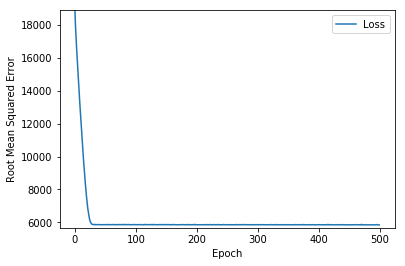

feature   label          predicted
  value   value          value
          in $           in $
--------------------------------------
 2548  13495           14014
 2548  16500           15533
 2823  16500           12847
 2337  13950           15539
 2824  17450           13787
 2507  15250           15649
 2844  17710           16257
 2954  18920           16987
 3086  23875           16804
 3053  17859           13168
 2395  16430           13168
 2395  16925           14909
 2710  20970           15213
 2765  21105           16815
 3055  24565           17783
 3230  30760           18611
 3380  41315           19302
 3505  36880            8156
 1488   5151           10289
 1874   6295           10482
 1909   6575           10300
 1876   5572           10300
 1876   6377           11692
 2128   7957           10803
 1967   6229           10924


In [86]:
#@title Double-click to view a possible solution to Task 4.

# Using median_income
#tried `enginesize`  and `horsepower` initially as corr are 0.9 and 0.8 resp
#my_feature = "enginesize"


my_feature = "curbweight" 
my_label="price" 

# Tune the hyperparameters.
learning_rate = 0.04
epochs = 500
batch_size = 25

# Don't change anything below this line.
my_model = build_model(learning_rate)
weight, bias, epochs, mae = train_model(my_model, training_df,
                                        my_feature, my_label,
                                        epochs, batch_size)

plot_the_loss_curve(epochs, mae)
predict_house_values(25, my_feature, my_label)